In [2]:
from google.colab import files
import pandas as pd
import keras 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [72]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
uploaded = files.upload()

Saving winequality-white-testing.csv to winequality-white-testing.csv
Saving winequality-white-training.csv to winequality-white-training.csv


In [5]:
uploaded

{'winequality-white-testing.csv': b'Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol\r\n0,7,0.31,0.31,9.1,0.036,45,140,0.99216,2.98,0.31,12\r\n1,7.3,0.155,0.49,1.3,0.039,34,136,0.9926,3.14,0.77,10.5\r\n2,6,0.26,0.24,1.3,0.053,66,150,0.9924,3.21,0.62,10.4\r\n3,6.6,0.18,0.26,17.3,0.051,17,149,0.9984,3,0.43,9.4\r\n4,6.2,0.29,0.26,13.1,0.046,55,204,0.99745,3.16,0.41,9.6\r\n5,5.8,0.42,0.3,2.2,0.035,26,129,0.989,3.32,0.47,12.9\r\n6,7.3,0.41,0.24,6.8,0.057,41,163,0.9949,3.2,0.41,9.9\r\n7,6.8,0.32,0.43,1.6,0.05,4,65,0.99346,3.27,0.47,10.7\r\n8,6.4,0.35,0.28,1.1,0.055,9,160,0.99405,3.42,0.5,9.1\r\n9,7.3,0.28,0.42,14.4,0.04,49,173,0.9994,3.28,0.82,9\r\n10,7.4,0.16,0.31,6.85,0.059,31,131,0.9952,3.29,0.34,9.7\r\n11,7.1,0.47,0.29,14.8,0.024,22,142,0.99518,3.12,0.48,12\r\n12,6.8,0.23,0.29,15.4,0.073,56,173,0.9984,3.06,0.41,8.7\r\n13,6.9,0.22,0.32,5.8,0.041,20,119,0.99296,3.17,0.55,11.2\r\n14,6.9,0.32,0.13,7.8

In [6]:
import pandas as pd
import io
df_train = pd.read_csv(io.StringIO(uploaded['winequality-white-training.csv'].decode('utf-8')))
df_test = pd.read_csv(io.StringIO(uploaded['winequality-white-testing.csv'].decode('utf-8')))
print(df_train.head())

   Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            8.7              0.23         0.32            13.4   
1   1            5.0              0.27         0.40             1.2   
2   2            8.0              0.16         0.36             1.5   
3   3            5.8              0.28         0.35             2.3   
4   4            7.1              0.14         0.33             1.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.044                 35.0                 169.0  0.99975  3.12   
1      0.076                 42.0                 124.0  0.99204  3.32   
2      0.033                 14.0                 122.0  0.99410  3.20   
3      0.053                 36.0                 114.0  0.99240  3.28   
4      0.104                 20.0                  54.0  0.99057  3.19   

   sulphates  alcohol  quality  
0       0.47      8.8        7  
1       0.47     10.1        6  
2       0.39     10.3        

In [74]:
df_test.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.0,0.310,0.31,9.1,0.036,45.0,140.0,0.99216,2.98,0.31,12.0
1,1,7.3,0.155,0.49,1.3,0.039,34.0,136.0,0.99260,3.14,0.77,10.5
2,2,6.0,0.260,0.24,1.3,0.053,66.0,150.0,0.99240,3.21,0.62,10.4
3,3,6.6,0.180,0.26,17.3,0.051,17.0,149.0,0.99840,3.00,0.43,9.4
4,4,6.2,0.290,0.26,13.1,0.046,55.0,204.0,0.99745,3.16,0.41,9.6


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output

In [0]:
df_train.drop(['Id'],axis = 1,inplace = True)
df_test.drop(['Id'],axis = 1,inplace = True)

In [9]:
df_test.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.310,0.31,9.10,0.036,45.0,140.0,0.99216,2.98,0.31,12.0
1,7.3,0.155,0.49,1.30,0.039,34.0,136.0,0.99260,3.14,0.77,10.5
2,6.0,0.260,0.24,1.30,0.053,66.0,150.0,0.99240,3.21,0.62,10.4
3,6.6,0.180,0.26,17.30,0.051,17.0,149.0,0.99840,3.00,0.43,9.4
4,6.2,0.290,0.26,13.10,0.046,55.0,204.0,0.99745,3.16,0.41,9.6
5,5.8,0.420,0.30,2.20,0.035,26.0,129.0,0.98900,3.32,0.47,12.9
6,7.3,0.410,0.24,6.80,0.057,41.0,163.0,0.99490,3.20,0.41,9.9
7,6.8,0.320,0.43,1.60,0.050,4.0,65.0,0.99346,3.27,0.47,10.7
8,6.4,0.350,0.28,1.10,0.055,9.0,160.0,0.99405,3.42,0.50,9.1
9,7.3,0.280,0.42,14.40,0.040,49.0,173.0,0.99940,3.28,0.82,9.0


In [10]:
df_train.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.7,0.23,0.32,13.40,0.044,35.0,169.0,0.99975,3.12,0.47,8.8,7
1,5.0,0.27,0.40,1.20,0.076,42.0,124.0,0.99204,3.32,0.47,10.1,6
2,8.0,0.16,0.36,1.50,0.033,14.0,122.0,0.99410,3.20,0.39,10.3,4
3,5.8,0.28,0.35,2.30,0.053,36.0,114.0,0.99240,3.28,0.50,10.2,4
4,7.1,0.14,0.33,1.00,0.104,20.0,54.0,0.99057,3.19,0.64,11.5,6
5,7.5,0.30,0.21,6.55,0.026,33.0,143.0,0.99244,2.92,0.35,11.1,5
6,6.6,0.41,0.27,10.70,0.110,20.0,103.0,0.99672,3.08,0.41,9.0,6
7,6.2,0.30,0.32,1.20,0.052,32.0,185.0,0.99266,3.28,0.44,10.1,5
8,6.8,0.23,0.32,1.60,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,6
9,6.8,0.22,0.31,1.40,0.053,34.0,114.0,0.99290,3.39,0.77,10.6,6


In [11]:
quality_train = Counter(df_train['quality'])
quality_train

Counter({3: 17, 4: 126, 5: 1148, 6: 1776, 7: 684, 8: 143, 9: 4})

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


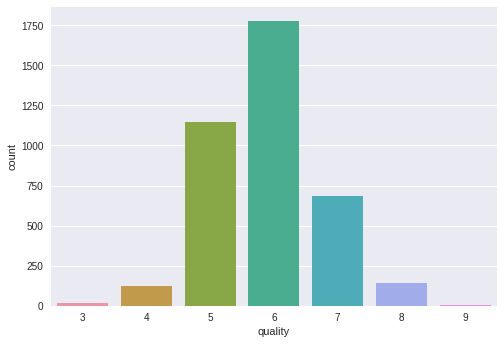

In [12]:
sns.countplot(df_train['quality'])

In [0]:
x_train = df_train.loc[:, df_train.columns != 'quality'].values.astype('float32')
y_train = df_train.loc[:,'quality'].values.astype('float32') # only labels i.e targets digits
x_test = df_test.values.astype('float32')

In [14]:
x_train.shape

(3898, 11)

In [0]:
## Normalizing the data
import numpy as np
def normalize(x_train, x_test):
    mu = np.mean(x_train,axis = 0)
    std = np.std(x_train, axis = 0)
    x_train_normalized = (x_train - mu) / std
    x_test_normalized = (x_test - mu) / std
    return x_train_normalized, x_test_normalized

In [61]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int32)

In [0]:
X_train_norm,X_test_norm = normalize(x_train,x_test)

In [0]:
# convert class vectors to binary class matrices One Hot Encoding
X_train, X_val, Y_train, Y_val = train_test_split(X_train_norm, y_train, test_size = 0.1, random_state=42)

In [90]:
y_train.shape

(3898,)

In [91]:
X_train_norm.shape

(3898, 11)

In [26]:
## Tried a lot of architectures, not sure which one worked well
## The best ones are the following two architectures
model = Sequential()
model.add(Dense(20, input_dim=X_train_norm.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [38]:
model = Sequential()
model.add(Dense(24, input_dim=X_train_norm.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 30)                360       
_________________________________________________________________
dense_23 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 96        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 928
Trainable params: 928
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [40]:
history = model.fit(X_train_norm, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.15)

Train on 3313 samples, validate on 585 samples
Epoch 1/150
3313/3313 [==============================] - 1s 298us/step - loss: 33.7907 - mean_squared_error: 33.7907 - mean_absolute_error: 5.7389 - val_loss: 29.7951 - val_mean_squared_error: 29.7951 - val_mean_absolute_error: 5.3693
Epoch 2/150
3313/3313 [==============================] - 0s 133us/step - loss: 19.4744 - mean_squared_error: 19.4744 - mean_absolute_error: 4.1114 - val_loss: 6.9702 - val_mean_squared_error: 6.9702 - val_mean_absolute_error: 2.2783
Epoch 3/150
3313/3313 [==============================] - 0s 151us/step - loss: 3.5662 - mean_squared_error: 3.5662 - mean_absolute_error: 1.5046 - val_loss: 2.3686 - val_mean_squared_error: 2.3686 - val_mean_absolute_error: 1.1911
Epoch 4/150
3313/3313 [==============================] - 0s 127us/step - loss: 1.8065 - mean_squared_error: 1.8065 - mean_absolute_error: 1.0366 - val_loss: 1.5497 - val_mean_squared_error: 1.5497 - val_mean_absolute_error: 0.9586
Epoch 5/150
3313/3313 [

In [0]:
predictions1=model.predict(X_test_norm)
predictions1=pd.DataFrame(predictions1,columns = ['quality'])
predictions1.to_csv("predictions_regression3.csv", index=True, header=True)
files.download('predictions_regression3.csv')